#   Importing dependencies

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import cufflinks as cf
cf.go_offline()

Reading data

In [3]:
data = pd.read_csv('./spam.csv', encoding='latin-1')

FileNotFoundError: [Errno 2] No such file or directory: './spam.csv'

gave utf-8 codec error so included encoding parameter

In [ ]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


Removing unncessary columns

In [ ]:
data = data[['v1', 'v2']]

In [ ]:
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


Renaming

In [ ]:
data.rename(columns={'v1': 'target', 'v2': 'text'}, inplace=True)

In [ ]:
data.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   target  5572 non-null   object
 1   text    5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [ ]:
data.describe()

,target,text
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


#   Distribution of data

<AxesSubplot: xlabel='target', ylabel='count'>

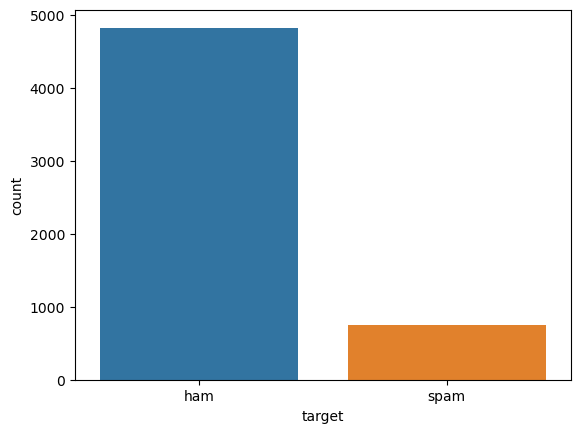

In [ ]:
sns.countplot(x = data['target'])

We can see that the data distribution is not balanced

In [ ]:
data.isnull().sum()

target    0
text      0
dtype: int64

No null values

In [ ]:
data.shape

(5572, 2)

In [ ]:
data.drop_duplicates(inplace=True)

In [ ]:
data.shape

(5169, 2)

Now creating a length column for each text

In [ ]:
data["length"] = data["text"].apply(lambda x: len(x))

In [ ]:
data.head()

,target,text,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [ ]:
g = data.pivot(columns="target", values="length").iplot(kind="box", asFigure=True, boxpoints='outliers')
g.update_layout(
    width=800,
    height=600,
)

Length of Ham messages lie between 2-174, averaging at 52.
Length of spam messages lie between 13-224, averaging at 149.
So we figure that spam messages generally are longer.

#   Pre-processing

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string
import re

In [ ]:
data.loc[3008].text

'Update_Now - 12Mths Half Price Orange line rental: 400mins...Call MobileUpd8 on 08000839402 or call2optout=J5Q'

In [ ]:
text = 'Update_Now - 12Mths Half Price Orange line rental: 400mins...Call MobileUpd8 on 08000839402 or call2optout=J5Q'
text = text.lower()
text

'update_now - 12mths half price orange line rental: 400mins...call mobileupd8 on 08000839402 or call2optout=j5q'

Removing punctuations and numbers

In [ ]:
text = re.sub(r'[^a-zA-Z\s]', ' ', text)
text

'update now     mths half price orange line rental     mins   call mobileupd  on             or call optout j q'

In [ ]:
words = nltk.word_tokenize(text)
stopwords = stopwords.words("english")
words = [word for word in words if word not in stopwords]
lemmatizer = WordNetLemmatizer()
words = [lemmatizer.lemmatize(word, pos="v") for word in words]
" ".join(words)

'update mths half price orange line rental mins call mobileupd call optout j q'

In [ ]:
def pre_process(text):
    
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', ' ', text)

    words = nltk.word_tokenize(text)
    stopwords = stopwords.words("english")
    words = [word for word in words if word not in stopwords]
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word, pos="v") for word in words]
    
    text = " ".join(words)
    
    return text

In [ ]:
data["text"] = data["text"].apply(lambda x: pre_process(x))

In [ ]:
data.head()

,target,text,length
0,ham,go jurong point crazy available bugis n great ...,111
1,ham,ok lar joke wif u oni,29
2,spam,free entry wkly comp win fa cup final tkts st ...,155
3,ham,u dun say early hor u c already say,49
4,ham,nah think go usf live around though,61


In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer, CountVectorizer

In [ ]:
from sklearn.model_selection import train_test_split
X = data["text"]
y = data["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [ ]:
bow = CountVectorizer()
X_train_vec = bow.fit_transform(X_train)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
# train a Logistic Regression Model
model = LogisticRegression()

In [ ]:
model.fit(X_train_vec, y_train)

LogisticRegression()

In [ ]:
X_test_vec = bow.transform(X_test)

In [ ]:
y_pred = model.predict(X_test_vec)

In [ ]:
y_pred

array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'spam'], dtype=object)

In [ ]:
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

Accuracy: 0.9696969696969697


<AxesSubplot: >

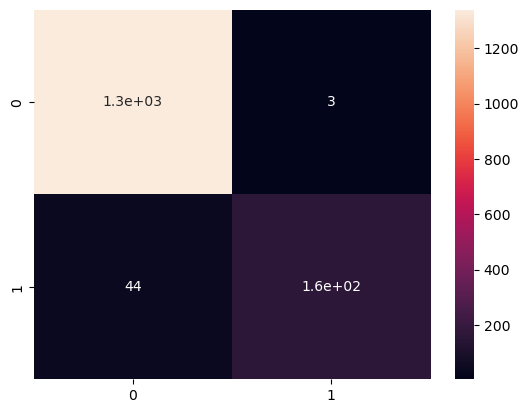

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

import seaborn as sns
sns.heatmap(cm, annot=True)

In [ ]:
cm

array([[1340,    3],
       [  44,  164]], dtype=int64)

In [ ]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

         ham       0.97      1.00      0.98      1343
        spam       0.98      0.79      0.87       208

    accuracy                           0.97      1551
   macro avg       0.98      0.89      0.93      1551
weighted avg       0.97      0.97      0.97      1551

